In [2]:
import matplotlib.pyplot as plt
import numpy.linalg as npm
import pandas as pd
import numpy as np
import math
import scipy.stats as sts
%matplotlib inline

In [3]:
data = pd.read_csv('0.csv', header=None)
data.head()

,0,1,2,3,4
0,-5.466447,1.0,7.942326,1.793864,0.009938
1,27.385862,1.0,3.745389,7.916537,0.010042
2,16.178068,1.0,1.637127,4.097489,0.010025
3,4.864779,1.0,3.860076,2.371178,0.009985
4,-1.989797,1.0,5.976570,1.686246,0.009957


Предположим, что зависимость имеет вид 𝑌 = ...
Скачайте данные из task2.csv, получив соответствующую выборкуОценкой параметра 𝜃 по методу наименьших квадратов на-
зывается величина 𝜃̂︀ = ...
... . Посчитайте эту оценку для выданных данных
и значение det(...). Сделайте вывод.

In [4]:
data = np.array(data)
Y = np.array(data[:,0])

In [5]:
X = np.array(data[:,1:])

In [6]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T),Y)

In [7]:
det = np.linalg.det(np.dot(X.T,X))

In [8]:
theta

array([ -3.13823839e+02,  -1.68185827e+00,   3.68421300e+00,
         3.16910941e+04])

In [9]:
det

0.68070070365265545

Сделайте вывод

In [15]:
%%time
la = np.arange(1, 100, 0.1)
X = np.matrix(X, dtype = float)
Y = np.matrix(Y, dtype = float).T

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 372 µs


In [11]:
def calc_theta(X,Y,l) :
    return np.array(npm.inv(X.T*X + l*np.identity(len(X.T*X)) ) * X.T * Y)
def calc_theta_i(l, i) :
    return calc_theta(np.delete(X,i,axis=0),np.delete(Y,i,axis=0),l)
def trans(x) :
    return np.array([x[0][i][0] for i in range(4)])

In [13]:
%%time
a = np.array([ [calc_theta_i(l,i) for i in range(len(X))] for l in la])

CPU times: user 1min 54s, sys: 80 ms, total: 1min 54s
Wall time: 1min 54s


In [187]:
N = len(X)
aa = np.array([[trans(a[l][i]) for i in range(N)] for l in len(la)])

/home/avk/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [222]:
s = aa.var(axis=1).T
len(s[0])

990

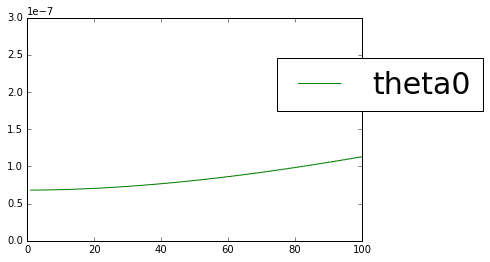

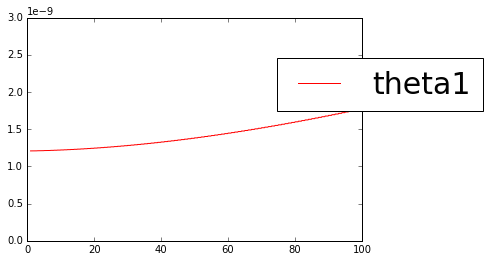

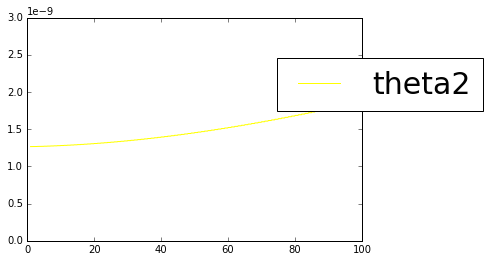

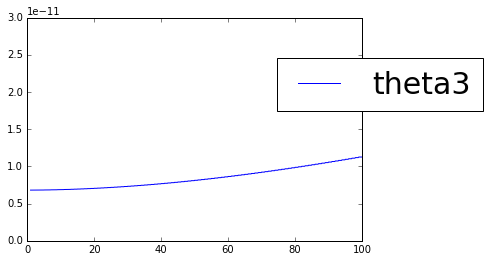

In [233]:
colors = ['green', 'red', 'yellow', 'blue']
def draw(sigma, i, ylim) :
    #plt.figure(figsize=(20,10))
    plt.plot(la, sigma, color=colors[i], label='theta' + str(i))
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
    plt.ylim(0,ylim)
    plt.show()

draw(s[0], 0, 0.0000003)
draw(s[1], 1, 0.000000003)
draw(s[2], 2, 0.000000003)
draw(s[3], 3, 0.00000000003)

Самое оптимальное лямбда - самое маленькое

/home/avk/Programs/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


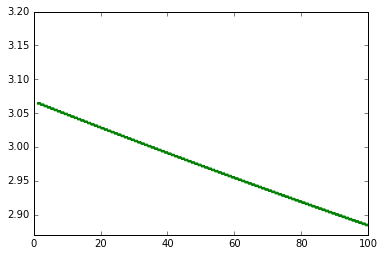

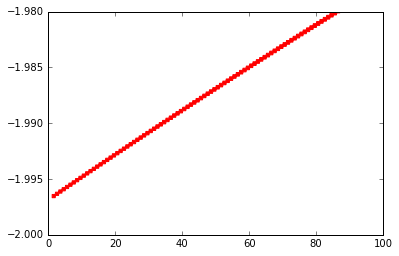

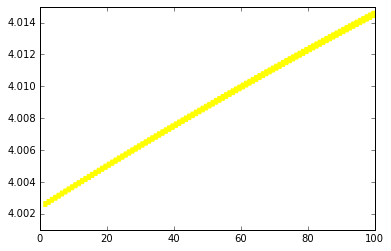

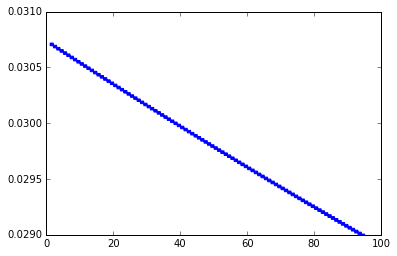

In [296]:
N = len(la)
colors = ['green', 'red', 'yellow', 'blue']
est_left = np.array([aa[i].min(axis=0) for i in range(N)])
est_right = np.array([aa[i].max(axis=0) for i in range(N)])
def draw1(l, r, i, b, a) :
    #plt.figure(figsize=(20,10))
    plt.fill_between(la, l, r, color = colors[i])
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
    plt.ylim(b,a)
    plt.show()

draw1(est_left.T[0], est_right.T[0], 0, 2.87, 3.2)
draw1(est_left.T[1], est_right.T[1], 1, -2, -1.98)
draw1(est_left.T[2], est_right.T[2], 2, 4.001, 4.015)
draw1(est_left.T[3], est_right.T[3], 3, 0.029, 0.031)


In [294]:
print(est_left.T[3])
print(est_right.T[3])

[ 0.03069903  0.03069903  0.03069903  0.03069903  0.03069903  0.03069903
  0.03069903  0.03069903  0.03069903  0.03069903  0.03067947  0.03067947
  0.03067947  0.03067947  0.03067947  0.03067947  0.03067947  0.03067947
  0.03067947  0.03067947  0.03065994  0.03065994  0.03065994  0.03065994
  0.03065994  0.03065994  0.03065994  0.03065994  0.03065994  0.03065994
  0.03064044  0.03064044  0.03064044  0.03064044  0.03064044  0.03064044
  0.03064044  0.03064044  0.03064044  0.03064044  0.03062098  0.03062098
  0.03062098  0.03062098  0.03062098  0.03062098  0.03062098  0.03062098
  0.03062098  0.03062098  0.03060154  0.03060154  0.03060154  0.03060154
  0.03060154  0.03060154  0.03060154  0.03060154  0.03060154  0.03060154
  0.03058212  0.03058212  0.03058212  0.03058212  0.03058212  0.03058212
  0.03058212  0.03058212  0.03058212  0.03058212  0.03056274  0.03056274
  0.03056274  0.03056274  0.03056274  0.03056274  0.03056274  0.03056274
  0.03056274  0.03056274  0.03054338  0.03054338  0

[ 0.03072254  0.03072254  0.03072254  0.03072254  0.03072254  0.03072254
  0.03072254  0.03072254  0.03072254  0.03072254  0.03070292  0.03070292
  0.03070292  0.03070292  0.03070292  0.03070292  0.03070292  0.03070292
  0.03070292  0.03070292  0.03068333  0.03068333  0.03068333  0.03068333
  0.03068333  0.03068333  0.03068333  0.03068333  0.03068333  0.03068333
  0.03066377  0.03066377  0.03066377  0.03066377  0.03066377  0.03066377
  0.03066377  0.03066377  0.03066377  0.03066377  0.03064423  0.03064423
  0.03064423  0.03064423  0.03064423  0.03064423  0.03064423  0.03064423
  0.03064423  0.03064423  0.03062473  0.03062473  0.03062473  0.03062473
  0.03062473  0.03062473  0.03062473  0.03062473  0.03062473  0.03062473
  0.03060525  0.03060525  0.03060525  0.03060525  0.03060525  0.03060525
  0.03060525  0.03060525  0.03060525  0.03060525  0.03058581  0.03058581
  0.03058581  0.03058581  0.03058581  0.03058581  0.03058581  0.03058581
  0.03058581  0.03058581  0.03056639  0.03056639  0

In [260]:
est_right.T

array([[ 3.06622739,  3.06622739,  3.06622739, ...,  2.88649251,
         2.88649251,  2.88649251],
       [-1.99634019, -1.99634019, -1.99634019, ..., -1.97731997,
        -1.97731997, -1.97731997],
       [ 4.00280014,  4.00280014,  4.00280014, ...,  4.01474081,
         4.01474081,  4.01474081],
       [ 0.03072254,  0.03072254,  0.03072254, ...,  0.02892488,
         0.02892488,  0.02892488]])